In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

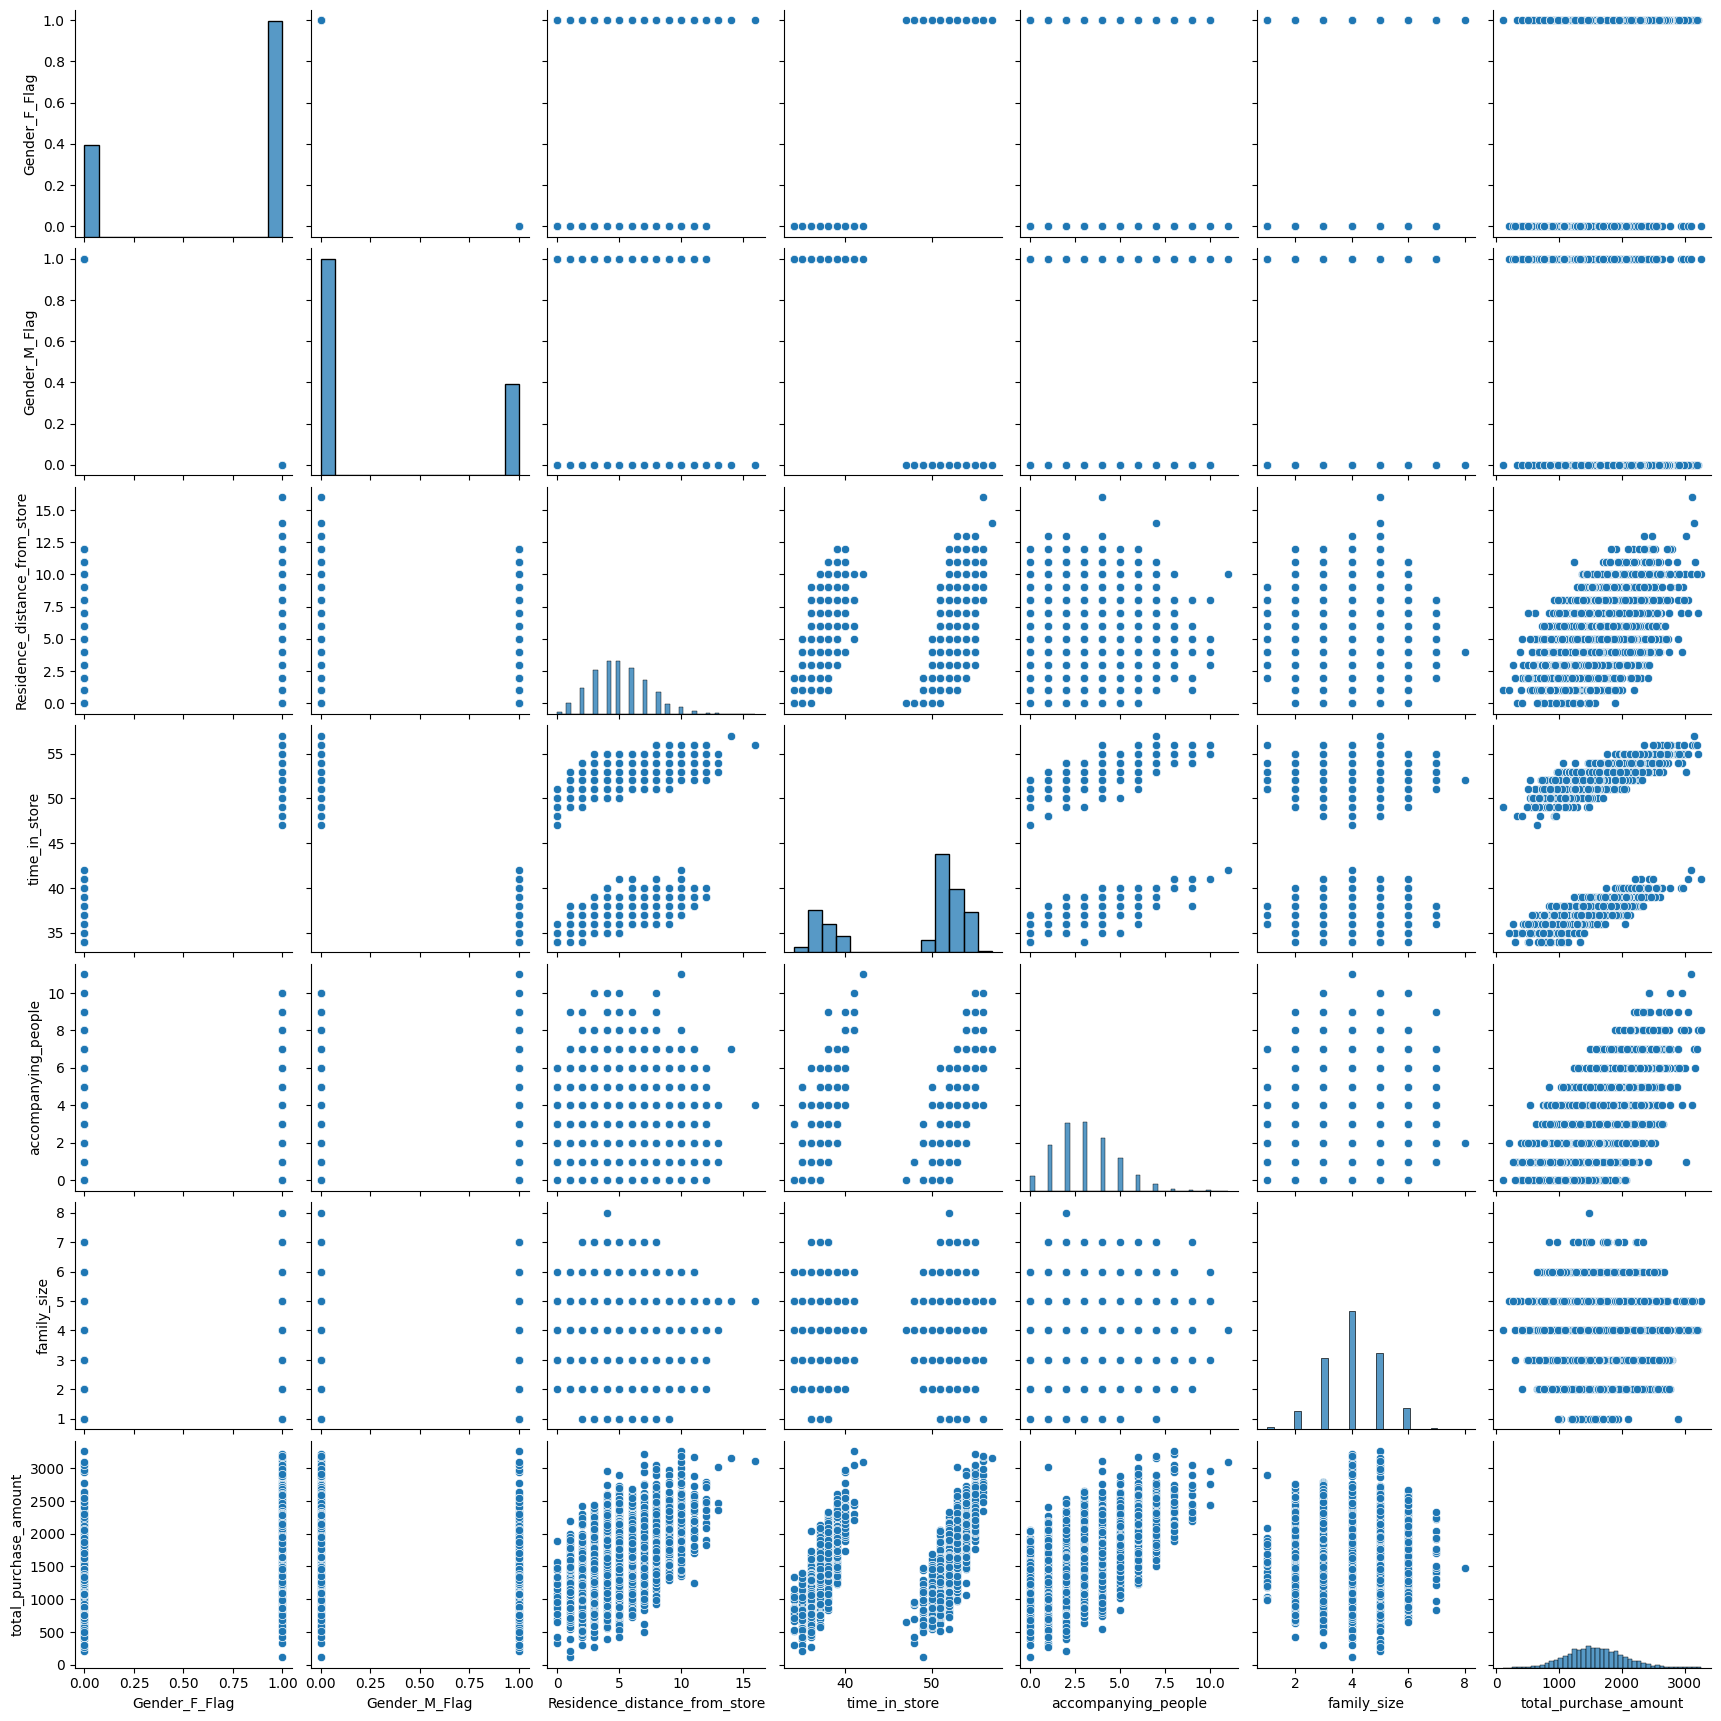

In [9]:
data = pd.read_csv('toptex.csv')
data = data.drop(columns=['Cust_ID'])
data.describe()

sns.pairplot(data)
plt.show()

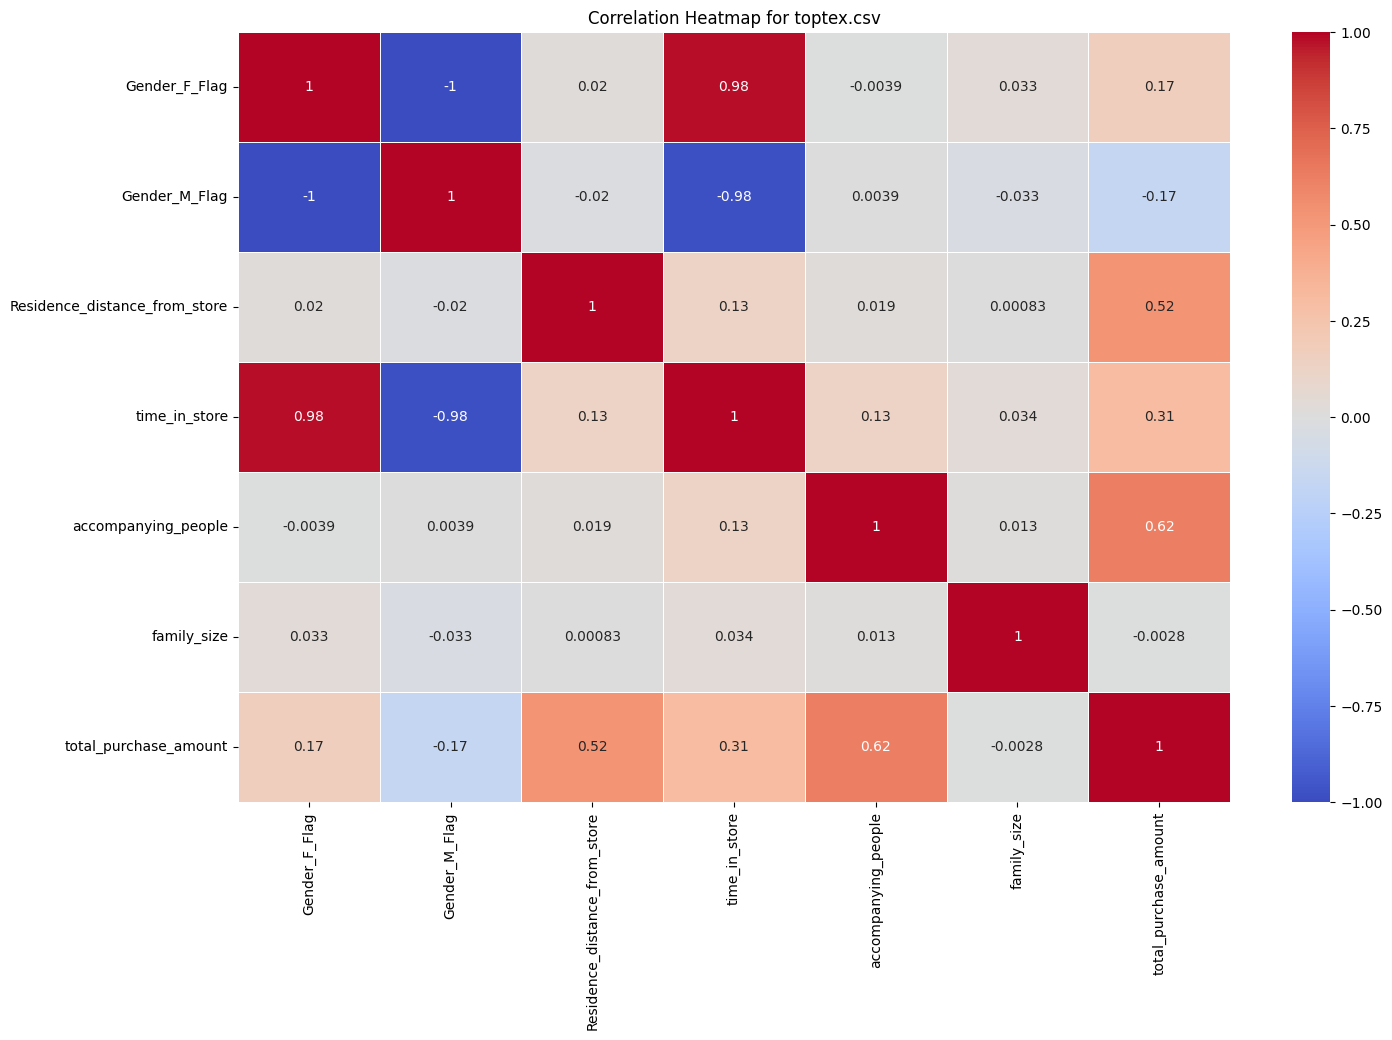

In [10]:
corr_matrix = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for toptex.csv')
plt.show()

In [11]:
X = data[['Gender_F_Flag', 'Residence_distance_from_store', 'accompanying_people', 'time_in_store']]   
y_purchase = data['total_purchase_amount']

In [12]:
X_train_purchase, X_test_purchase, y_train_purchase, y_test_purchase = train_test_split(X, y_purchase, test_size=0.2, random_state=42)

In [13]:
model = sm.OLS(y_purchase, X).fit()
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     total_purchase_amount   R-squared (uncentered):                   0.977
Model:                               OLS   Adj. R-squared (uncentered):              0.977
Method:                    Least Squares   F-statistic:                          4.627e+04
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):                        0.00
Time:                           10:46:44   Log-Likelihood:                         -30387.
No. Observations:                   4380   AIC:                                  6.078e+04
Df Residuals:                       4376   BIC:                                  6.081e+04
Df Model:                              4                                                  
Covariance Type:               nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025     

In [14]:
y_train_pred = model.predict(X_train_purchase)
y_test_pred = model.predict(X_test_purchase)
print('MSE train: %.6f, test: %.6f' % (mean_squared_error(y_train_purchase, y_train_pred), mean_squared_error(y_test_purchase, y_test_pred)))
print('R^2 train: %.6f, test: %.6f' % (r2_score(y_train_purchase, y_train_pred), r2_score(y_test_purchase, y_test_pred)))


MSE train: 62045.199274, test: 62670.240300
R^2 train: 0.678955, test: 0.675615
